In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

# Herramientas de visualización
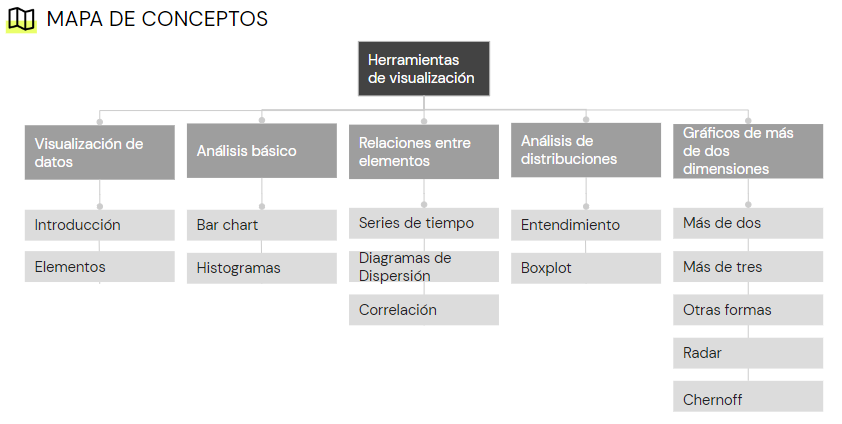
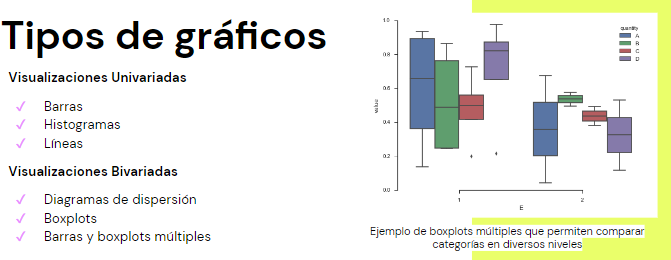

## GRAFICO: Barras
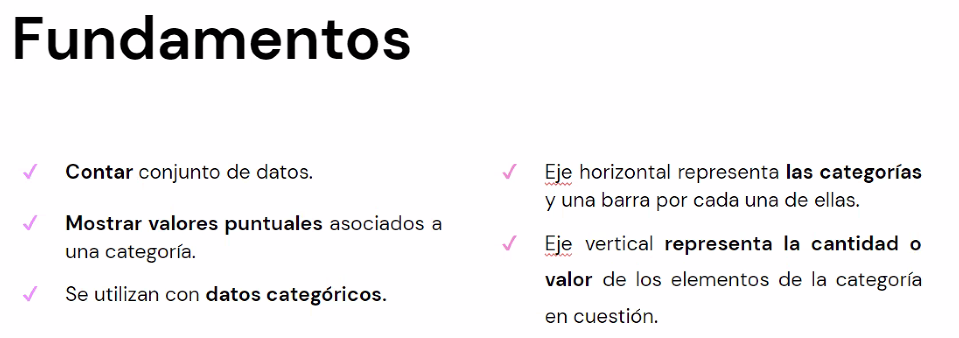

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# extraer agrupado
df_n = df[['Survived', 'Sex', 'Pclass']].groupby(by=['Sex', 'Pclass']).count().reset_index()
df_n.head()

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

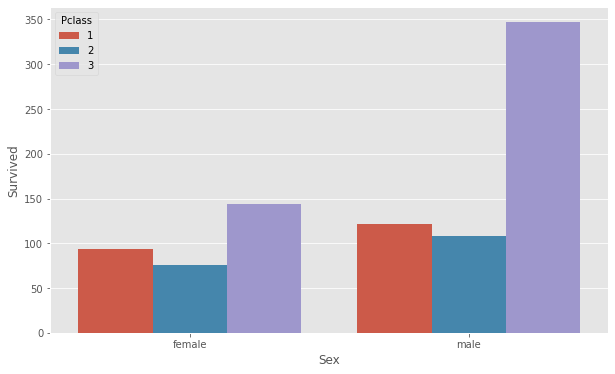

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_n, y='Survived', x='Sex', hue='Pclass')

### LIBRERIA: Bokeh

In [5]:
from bokeh.plotting import figure, show

In [9]:
x = [1,2,3,4,5]
y = [6,7,2,4,5]

p = figure(title='Línea Recta', x_axis_label='x', y_axis_label='y')
p.line(x, y, legend_label='Gráfica', line_width=2)
show(p)

In [10]:
p = figure(title='Puntos', x_axis_label='x', y_axis_label='y')
p.circle(x, y, fill_color='red', size=20, color='blue', alpha=.5)
show(p)

### EJEMPLO

In [18]:
from bokeh.palettes import Spectral6
from bokeh.io import show, output_notebook
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.models.tools import HoverTool
from bokeh.plotting import figure

In [19]:
# extraer agrupado
df_x = df[['Survived', 'Pclass']].groupby(by=['Pclass']).count().reset_index()
df_x['Pclass'] = df_x['Pclass'].astype('str')
df_x

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [28]:
source = ColumnDataSource(data=dict(Pclass=df_x.Pclass, counts=df_x.Survived, color=Spectral6))

p = figure(x_range=df_x.Pclass, plot_width=500, plot_height=250, toolbar_location=None,
    title='Clases involucradas')

p.vbar(source=source, x='Pclass', top='counts', color='color', legend='Pclass')
p.add_tools(HoverTool())  # HoverTool para gráficos dinámicos
show(p)

## GRAFICO: Histogramas
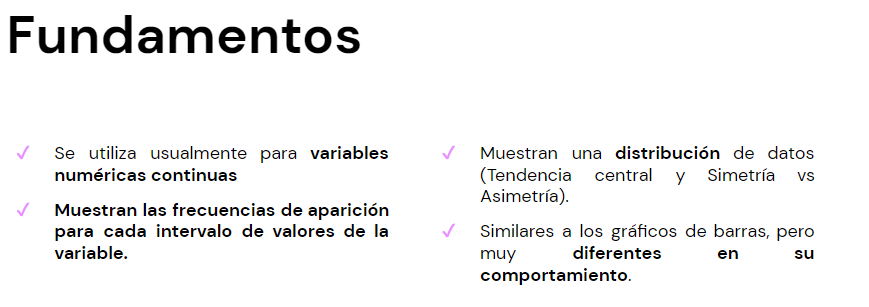

<AxesSubplot:xlabel='Fare', ylabel='Count'>

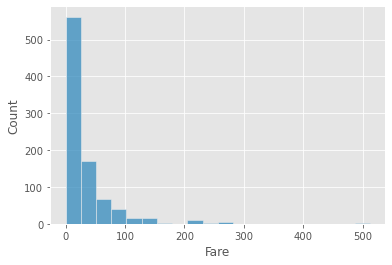

In [25]:
sns.histplot(data=df, x="Fare",bins=20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

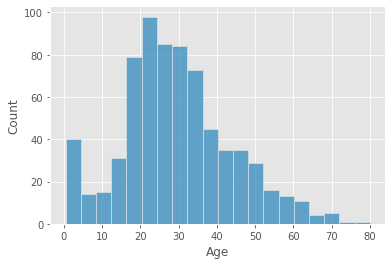

In [26]:
sns.histplot(data=df, x="Age",bins=20)

### LIBRERIA: Bokeh

In [29]:
data = df.Age.values
data = data[~np.isnan(data)]

hist, edges = np.histogram(data, density=True, bins=20)

p = figure(plot_height=300, plot_width=500, title='Hitograma de edades')

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.xaxis.axis_label = "Edad"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool())
#output_file("hist.html")
show(p)

In [30]:
# Datasets de ejemplo en Bokeh
import bokeh.sampledata

# Desacargar los datasets a la PC
# bokeh.sampledata.download()

### EJEMPLO

In [53]:
data = pd.read_csv('../datasets/Time Series Data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2019,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,5/19/2019,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,5/20/2019,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,5/21/2019,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,5/22/2019,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321


In [54]:
# correlaciones entre columnas
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.770272,0.902100,0.646006,0.646006,-0.130611
High,0.770272,1.000000,0.733461,0.856194,0.856194,0.256603
Low,0.902100,0.733461,1.000000,0.783333,0.783333,-0.364082
Close,0.646006,0.856194,0.783333,1.000000,1.000000,-0.029713
Adj Close,0.646006,0.856194,0.783333,1.000000,1.000000,-0.029713
Volume,-0.130611,0.256603,-0.364082,-0.029713,-0.029713,1.000000


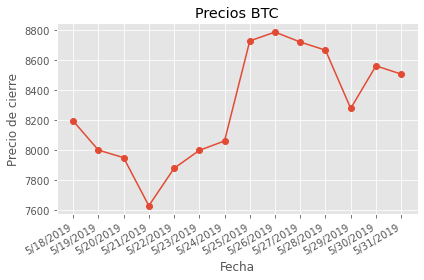

In [32]:
price_data = data['Date']
price_close = data['Close']

plt.plot_date(price_data, price_close, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Precios BTC')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.tight_layout()
plt.show()

In [34]:
# con bokeh
from bokeh.models import DatetimeTickFormatter

In [33]:
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14 non-null     datetime64[ns]
 1   Open       14 non-null     float64       
 2   High       14 non-null     float64       
 3   Low        14 non-null     float64       
 4   Close      14 non-null     float64       
 5   Adj Close  14 non-null     float64       
 6   Volume     14 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 912.0 bytes


In [36]:
line_plot = figure(plot_width=600, plot_height=500, title='Line Plot',
    x_axis_label='Fecha', y_axis_label='Precio', x_axis_type='datetime')

line_plot.line(data.Date, data['Open'], legend='Open', line_width=2)
line_plot.xaxis.formatter=DatetimeTickFormatter(
       hours=["%d %B %Y"],days=["%d %B %Y"],
       months=["%d %B %Y"],years=["%d %B %Y"])
line_plot.add_tools(HoverTool())
line_plot.legend.location = "top_left"
show(line_plot)

In [40]:
!pip show bokeh

Name: bokeh
Version: 2.4.2
Summary: Interactive plots and applications in the browser from Python
Home-page: https://github.com/bokeh/bokeh
Author: Bokeh Team
Author-email: info@bokeh.org
License: BSD-3-Clause
Location: c:\users\alk10\anaconda3\lib\site-packages
Requires: numpy, Jinja2, packaging, PyYAML, pillow, typing-extensions, tornado
Required-by: panel, hvplot


## GRAFICO: Diagrama de Dispersión
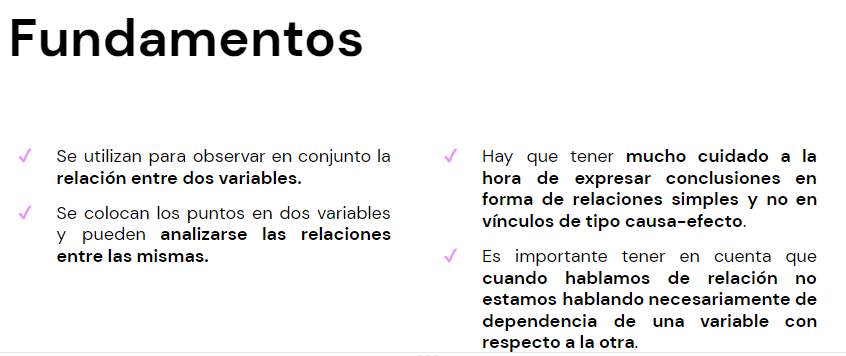

Text(0, 0.5, 'Precio de apertura')

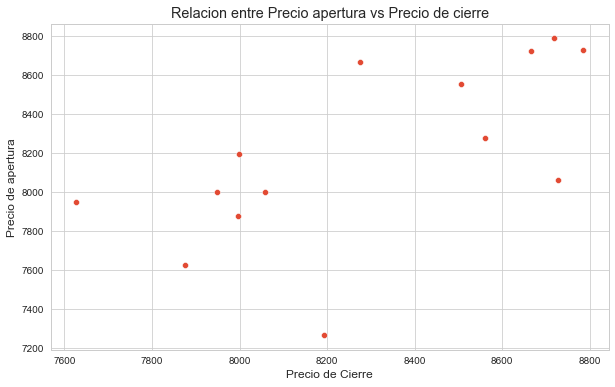

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Close, y= data.Open)

plt.title('Relacion entre Precio apertura vs Precio de cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Precio de apertura')

### LIBRERIA: Bokeh

In [44]:
# Grafico (Fondo)
scatter_plot = figure(plot_width=700, plot_height=300, x_axis_label='Close', y_axis_label='Open',
    title='Dispersion Open vs Close')

# Scatter plot
scatter_plot.circle(data.Close, data.Open, size=5, line_color='navy', fill_color='orange', fill_alpha=0.5)

scatter_plot.add_tools(HoverTool())
show(scatter_plot)

## GRAFICO: Correlación
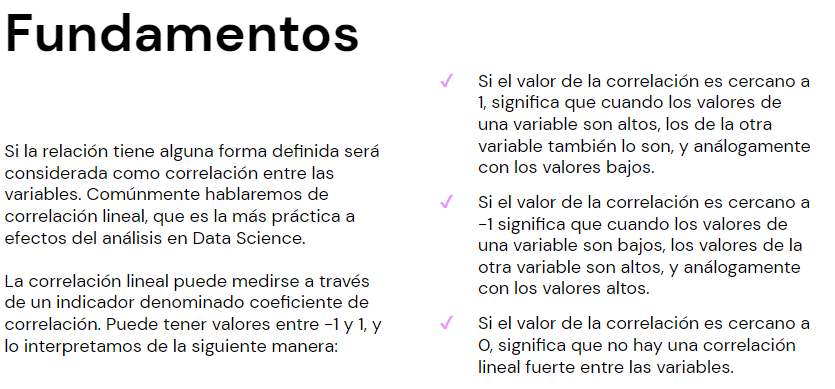

## GRAFICO: Diagrama de caja y bigotes (Boxplot)
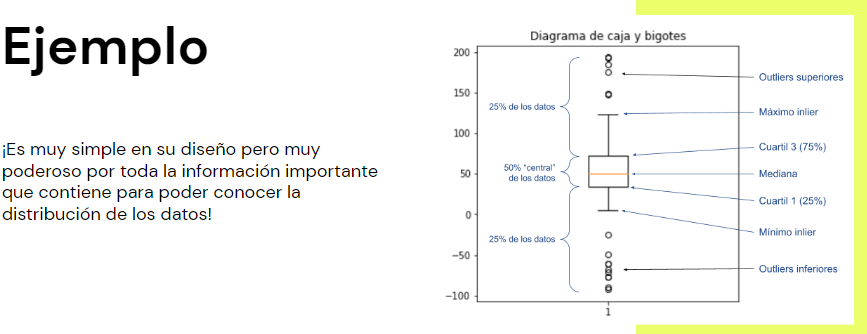
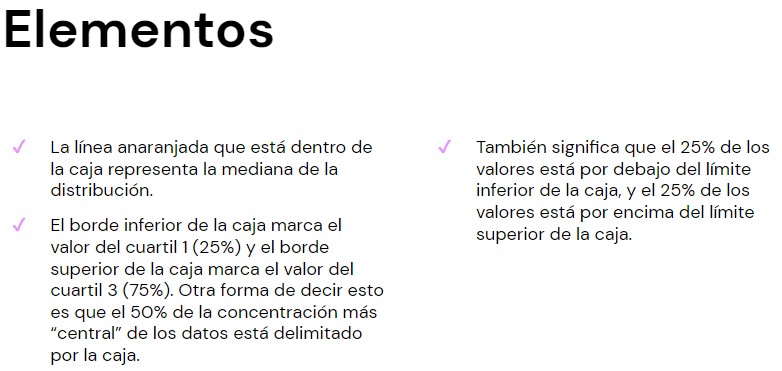
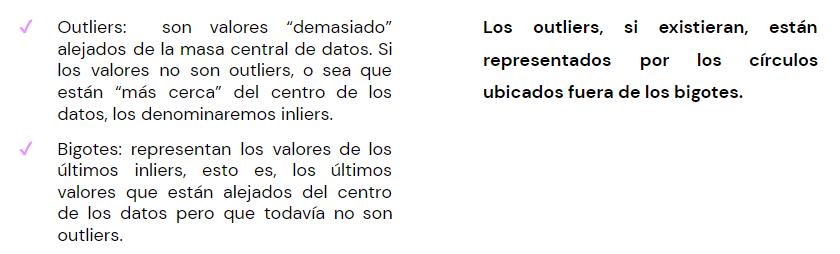

## GRAFICO para más de 2 dimensiones

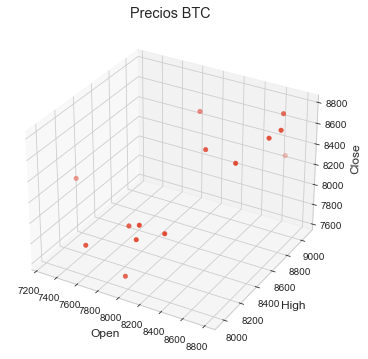

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = data.Open
y = data.High
z = data.Close

ax.set_title('Precios BTC')
ax.set_xlabel('Open')
ax.set_ylabel('High')
ax.set_zlabel('Close')

ax.scatter(x, y, z)
plt.show()

## GRAFICO: Chernov (más de 3 dimensiones)

In [48]:
!pip install ChernoffFace

In [49]:
from ChernoffFace import chernoff_face

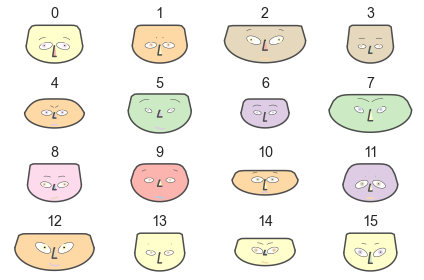

In [51]:
# Generar semilla
np.random.seed(32)
data = np.random.rand(16, 12)

# Make Chernoff faces
fig = chernoff_face(data=data, 
    titles=[str(x) for x in list(range(len(data)))], 
    color_mapper=mpl.cm.Pastel1)

# Display
fig.tight_layout()
plt.show()

## GRAFICO: Radar
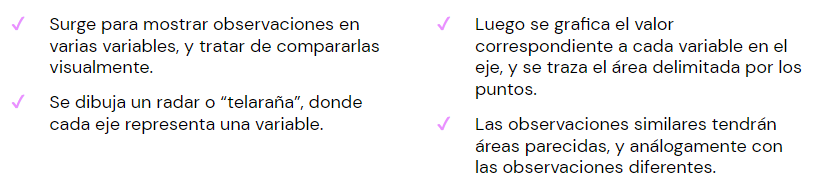

# Procesamiento estadístico de datos
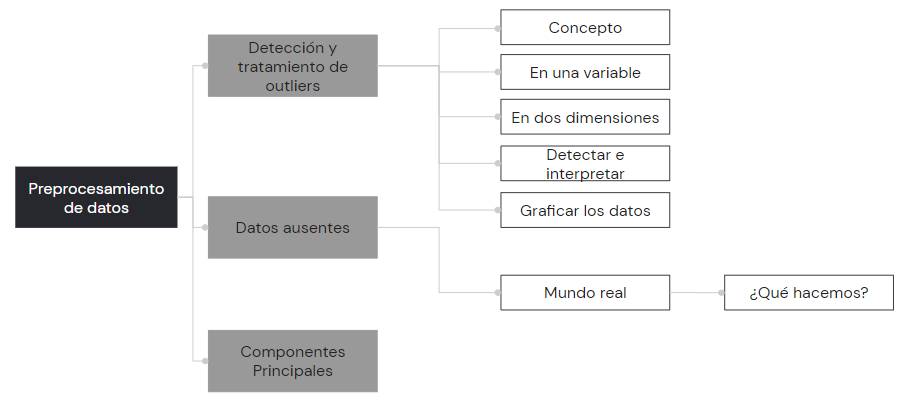
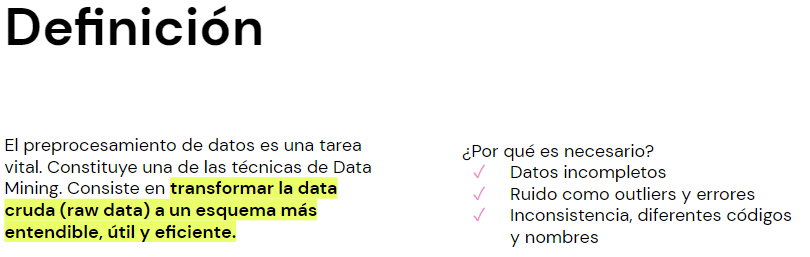
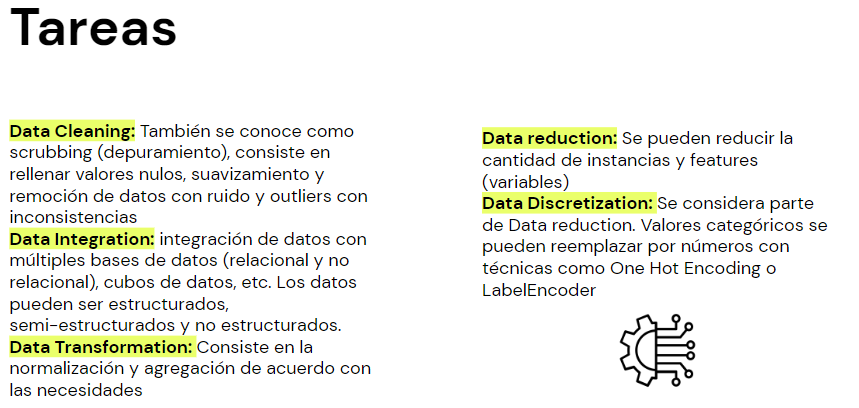
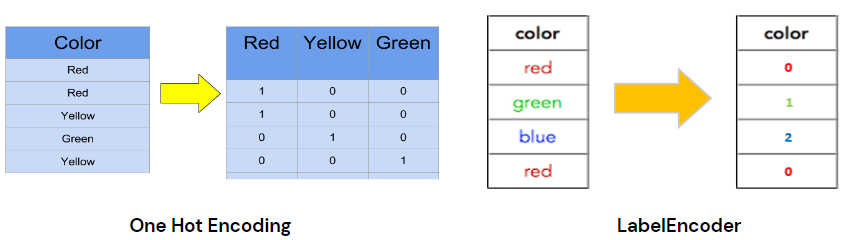

## OUTLIERS
Si existen outliers en una variable, podemos verlos de diferentes formas: 
* Diagrama de caja y bigotes.
* Método IQR
* Método Z score
* Distancia media (Multivariada)


In [55]:
datos = pd.Series(np.random.normal(size=10))
datos

0    0.483649
1   -1.739011
2   -0.452153
3   -0.494040
4    2.735992
5   -0.194406
6    0.608724
7    1.492002
8    0.094666
9    0.091541
dtype: float64

<AxesSubplot:>

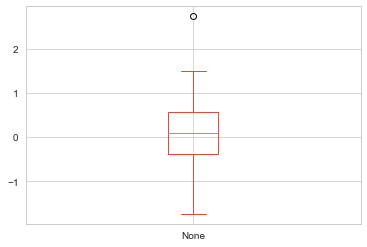

In [56]:
datos.plot(kind='box')

In [57]:
# Calcular cuartiles
c1 = datos.quantile(.25)
c2 = datos.quantile(.75)
c1, c2

(-0.3877165240332252, 0.5774551074848931)

In [58]:
# Datos entre cuartiles
datos_limpios = datos[datos.between(c1, c2)]
datos_limpios

0    0.483649
5   -0.194406
8    0.094666
9    0.091541
dtype: float64

### EJEMPLO dato atípico y método z score

In [59]:
from scipy import stats

In [63]:
# valor atipico 1500
my_df = pd.DataFrame({ 'data': [-2,7,15,19,34,39,50,13,19,14,87,89,1500] })

<AxesSubplot:>

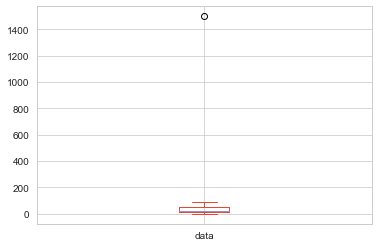

In [64]:
my_df.plot(kind='box')

In [66]:
# Método ZScore
my_df['z_score'] = stats.zscore(my_df['data'])

In [67]:
my_df

,data,z_score
0,-2,-0.374676
1,7,-0.351724
2,15,-0.331323
3,19,-0.321123
4,34,-0.282870
5,39,-0.270120
6,50,-0.242068
7,13,-0.336424
8,19,-0.321123
9,14,-0.333873


In [68]:
# filtrar los z_score <= 3
my_df.loc[my_df['z_score'].abs() <= 3]

,data,z_score
0,-2,-0.374676
1,7,-0.351724
2,15,-0.331323
3,19,-0.321123
4,34,-0.282870
5,39,-0.270120
6,50,-0.242068
7,13,-0.336424
8,19,-0.321123
9,14,-0.333873


### MANEJO DE DATOS NULOS

In [70]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(url, sep=',', header=None)
df.replace(0, np.nan, inplace=True)  # Remplaza 0 por nan para ejemplo
df.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


#### SimpleImputer

In [71]:
from sklearn.impute import SimpleImputer

In [77]:
imputador = SimpleImputer(missing_values=np.nan, strategy='median')
transformados = pd.DataFrame(imputador.fit_transform(df))
transformados.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [78]:
from bokeh.sampledata.iris import flowers as df
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### ANALISIS DE COMPONENTES PRINCIPALES

In [82]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# Ejercicio en grupo

Consigna: 
1. Importar datos de Acciones Globales (que están hosteados en GITHUB en el siguiente enlace Monitoreo de Acciones
2. Identificar potenciales valores atípicos y posibles causas 
3. Calcular la matriz de correlación para todas las acciones presentadas.
4. Interpretar los resultados obtenidos




In [83]:
url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
df = pd.read_csv(url)
df.head()

,formatted_date,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
0,2016-01-01,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999
1,2016-02-01,100.671043,52.064243,697.770020,552.520020,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999
2,2016-03-01,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998
3,2016-04-01,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000
4,2016-05-01,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001


In [84]:
df.describe()

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,166.141364,70.467695,1309.236057,1844.628025,133.132113,99.241065,25.946568,56.735507,111.312456,81.478392,90.851429,145.278413,218.651822,115.617464
std,42.876054,22.053342,583.436550,944.397337,77.765768,30.235695,8.089168,10.997466,28.170181,26.520324,22.909133,52.414162,95.469659,75.914087
min,98.913841,45.652046,692.099976,552.520020,45.453705,48.033066,11.132540,33.707108,57.754189,35.192841,31.853811,69.556580,83.956566,36.139999
25%,137.941452,52.327950,934.915009,974.299988,66.861931,80.640980,21.816364,48.657539,89.519512,62.162132,72.517128,94.559734,122.293816,56.109999
50%,165.378510,62.786278,1119.920044,1735.910034,107.740570,96.035423,25.971552,59.150528,122.888184,78.211067,93.269997,143.700562,211.931427,88.760002
75%,202.356850,84.434284,1431.575012,2616.410034,190.287773,109.950825,29.027129,64.777954,133.650467,96.858334,111.008904,190.040054,297.106628,164.619995
max,244.196198,120.441193,2965.409912,3507.070068,331.014404,168.872391,47.551128,77.564484,160.020004,143.949997,131.389603,245.622177,384.999420,291.480011


In [ ]:
# deteccion de outliers

Deteccion de outliers
- convertir a z score (valor - media / std)

- Grafica: sns.heatmap()